In [1]:
import keras,pandas as pd,os
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow_addons.optimizers import AdamW
from keras.optimizers import SGD,Adamax,RMSprop,Adam
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

In [2]:
S_3=pd.read_csv('dataset/Sepsis3_rf_top20_data.csv')
S_1=pd.read_csv('dataset/Siover1_rf_top20_data.csv')
S_7=pd.read_csv('dataset/Sipt7_rf_top20_data.csv')
from utils.dataloader import csv_loader
Seps3,Sio1,Sipt7,data_shape=csv_loader(S_3,S_1,S_7)


Seps3_x=Seps3.iloc[:,1:data_shape[0]]
Seps3_y=Seps3['sofa3m']

Siov1_x=Sio1.iloc[:,1:data_shape[1]]
Siov1_y=Sio1['si1m']

Sipt7_x=Sipt7.iloc[:,1:data_shape[2]]
Sipt7_y=Sipt7['si0.7m']
print(Seps3_y.shape)
print(Seps3_x.shape)


(4314,)
(4314, 20)


In [3]:
from sklearn.model_selection import train_test_split
from utils.dataloader import normalized
train_x, test_x, train_y, test_y = train_test_split(Seps3_x,Seps3_y,test_size = 0.25, random_state = 1234, stratify =Seps3_y)
# print(train_x)
train_x=normalized(train_x)
test_x=normalized(test_x)
print(train_y.shape)
print(train_x.shape)
print(test_y.shape)
print(test_x.shape)
print(sum(test_y))

(3235,)
(3235, 20)
(1079,)
(1079, 20)
135


/ssd1/nn/HRV/utils/dataloader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[conti_var] = X_conti[conti_var].values
/home/john/anaconda3/envs/er_tf2/lib/python3.7/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/home/john/anaconda3/envs/er_tf2/lib/python3.7/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [4]:

# count=0
# only_true_y=test_y
# only_true_x=test_x
# compare=pd.concat([test_x,test_y],axis=1)
# print(compare.shape)
# datalen=compare.shape[1]
# compare.head()
# sv_index=compare.index
# count=0

# # print(compare.index[2])
# for i in range(datalen):
#     if compare.iloc[i,20]==0:
#         print(compare.iloc[i,20])
#         compare=compare.drop(index=compare.index[i])
#     count+=1

# print(compare.shape)

In [5]:
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

Epoch 1/300
30/30 [==============================] - 0s 13ms/step - loss: 0.3648 - accuracy: 0.8588 - val_loss: 22.2565 - val_accuracy: 0.8796
Epoch 2/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2933 - accuracy: 0.8808 - val_loss: 5.5015 - val_accuracy: 0.8796
Epoch 3/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2820 - accuracy: 0.8894 - val_loss: 1.8451 - val_accuracy: 0.8796
Epoch 4/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2673 - accuracy: 0.8949 - val_loss: 0.9080 - val_accuracy: 0.8796
Epoch 5/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2511 - accuracy: 0.8997 - val_loss: 0.4611 - val_accuracy: 0.8827
Epoch 6/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.9048 - val_loss: 0.2551 - val_accuracy: 0.8920
Epoch 7/300
30/30 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 0.9055 - val_loss: 0.2455 - val_accuracy: 0.8920
Epoch 8/300

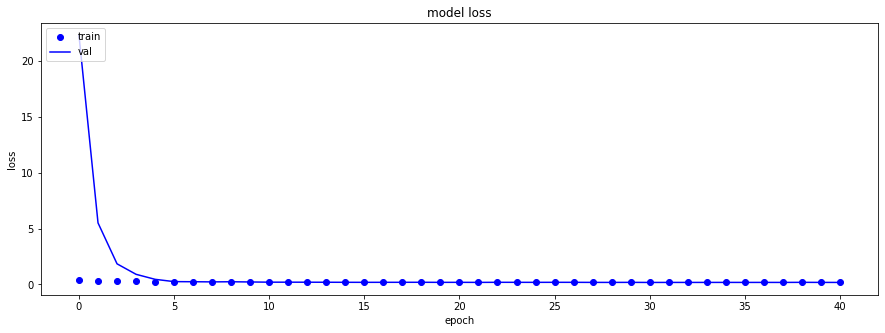

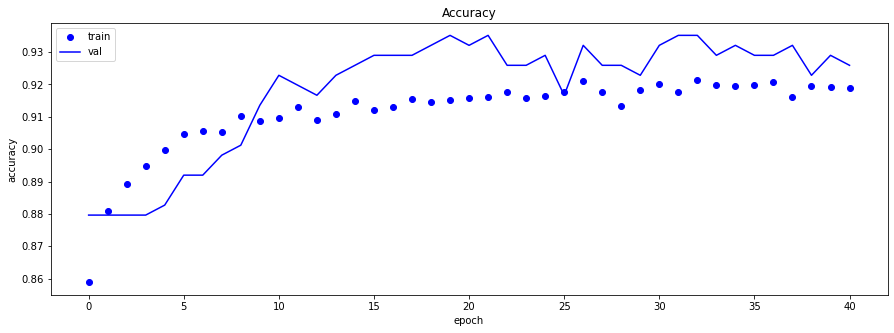

In [6]:
from utils.model import best_model
model_best = best_model(train_x, test_x, train_y, test_y,input_shape=20, 
                        batch=100,epoch=300,lr=1e-1,decay=1e-2,momentum=0.8,af='relu',
                        units_L=2,dropout=0.2,units_num=100,warm_up=0)

(1079, 1)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
=== Accuracy ===
Accuracy (train): 0.928903
Accuracy (test): 0.931418


=== Precision ===
Precision (train): 0.826415
Precision (test): 0.835165


=== Recall ===
Recall (train): 0.543424
Recall (test): 0.562963


=== F1 score ===
F1 score (train): 0.655689
F1 score (test): 0.672566


=== Cohens Kappa ===
Cohens kappa (train): 0.617925
Cohens kappa (test): 0.635879


=== ROC AUC ===
ROC AUC for training dataset: 0.957970
ROC AUC for testing dataset: 0.926954


=== Confusion matrix for train datset ===
[[2786   46]
 [ 184  219]]


=== Confusion matrix for test datset ===
[[929  15]
 [ 59  76]]


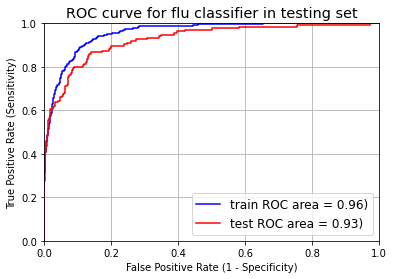

In [7]:
from utils.visualize import visualize
# predict probabilities for test set
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)
print(yhat_probs_test.shape)
yhat_classes_train,yhat_classes_test=visualize(yhat_probs_train,yhat_probs_test,model_best,train_x,train_y,test_x,test_y)

In [40]:
datalist=["Seps3","Siov1","Sipt7"]
dataTrue=["sofa3m","si1m","si0.7m'"]
datatype=datalist[0]
dataT=dataTrue[0]
pre_test= pd.DataFrame(yhat_probs_test,columns = [dataT])
pre_train= pd.DataFrame(yhat_probs_train,columns = [dataT])
true_test= pd.DataFrame(test_y)
true_test.columns=["ground_truth"]
true_train= pd.DataFrame(train_y)
true_train.columns=["ground_truth"]
train = pd.concat([true_train.reset_index(),pre_train],axis=1)
test = pd.concat([true_test.reset_index(),pre_test],axis=1)
print(train)

      index  ground_truth    sofa3m
0      1180             0  0.013867
1      3099             0  0.002480
2      2605             0  0.005263
3      4128             0  0.000929
4      1322             0  0.013401
...     ...           ...       ...
3230   2192             0  0.011081
3231   3639             0  0.009185
3232   2368             0  0.001610
3233   4192             0  0.000010
3234   3093             0  0.009598

[3235 rows x 3 columns]


In [41]:
# true_train.to_csv("dataset/outcome_csv/%s_train_true.csv"%(datatype),index=False)
# pre_train.to_csv("dataset/outcome_csv/%s_train_pre.csv"%(datatype),index=False)
# true_test.to_csv("dataset/outcome_csv/%s_test_true.csv"%(datatype),index=False)
# pre_test.to_csv("dataset/outcome_csv/%s_test_pre.csv"%(datatype),index=False)

train.to_csv("dataset/outcome_csv/%s_train.csv"%(datatype),index=False)
test.to_csv("dataset/outcome_csv/%s_test.csv"%(datatype),index=False)